In [2]:
from pyfiles.ftsteane import *

In [2]:
n = 15

angle = np.linspace(0,1,n+2)
angle = np.delete(angle, [n+1])
angle = np.delete(angle, [0])

a, b = [], []
with open("text/unitary{}.txt".format(n), "r") as file:
    for line in file:
        a.append(list(map(str, line.strip().split(","))))
with open("text/adjunitary{}.txt".format(n), "r") as file:
    for line in file:
        b.append(list(map(str, line.strip().split(","))))

In [4]:
qc = code_goto()
qecc = ClassicalRegister(6)
qc.add_register(qecc)

counter = 0

X_L(qc,1)
H_L(qc,0)
#############################
for j in range(2):
    CU_L(qc, a[0], b[0], qecc, err=False, ecc=False)
###############################
H_L(qc, pos=0)

gates(qc)

print("Depth of the circuit: ", qc.depth())

hmm = dict(qc.count_ops())
hmm["reset"] = 0
hmm["measure"] = 0
hmm["if_else"] = 0
counter += sum(hmm.values())

# readout(qc, 0, 1, 0.000)

Amount of gates in this circuit:  12515
Depth of the circuit:  2479


In [5]:
#dritte Iteration
qc = code_goto()

qecc = ClassicalRegister(6)
qc.add_register(qecc)

X_L(qc,1)
H_L(qc,0)
# qec_ft(qc, qecc, 0), qec_ft(qc, qecc, 1)
CT_L(qc, qecc, err=True, ecc = False)
# qec_ft(qc, qecc, 0)
adj_T_L(qc, 0, qecc=qecc, err=False, ecc=False)
H_L(qc,0)
# qec_ft(qc, qecc, 0)

gates(qc)

print("Depth of the circuit: ", qc.depth())

readout(qc, 0, 1, 0.000)

Amount of gates in this circuit:  6477
Depth of the circuit:  3545


(1.0, 0.0, 0.0, 0.0)

In [ ]:
#erste iteration, 0.3 better approx, nicht laufen lassen, das dauert wsl knapp 20-30 min. !!!!
qc = code_goto()

qecc = ClassicalRegister(6)
qc.add_register(qecc)

X_L(qc,1)
H_L(qc,0)
#qec_ft(qc, qecc, 0), qec_ft(qc, qecc, 1)
for j in range(4):
    CU_L(qc, qecc=qecc, err=False)
H_L(qc,0)

gates(qc)

print("Depth of the circuit: ", qc.depth())

zeros, ones, preselec, postselec = readout(qc, 0, 1, 0.0)

Amount of gates in this circuit:  132477
Depth of the circuit:  53449


In [ ]:
ok, errr = Leon(3, 2, argh=0.0001, err=True, k=1)           #mit qec: 30min, ohne qec: 18 min

print("y = ", ok)
print("Err = ", errr)

y =  0.16666666666666666
Err =  0.08838834764831842


In [23]:
def sigamcode(n=2):             #encodes |00>_L
    qr = QuantumRegister(7*n+1,"q")
    cbits = ClassicalRegister(9+6,"c")
    qc = QuantumCircuit(qr, cbits)
    
    anc = qc.num_qubits - 1

    qc.h(0)                            #directly implements a t gate onto the steane code
    qc.t(0)

    for i in range(n):
        qc.h(1+7*i)
        qc.h(2+7*i)
        qc.h(3+7*i)

        qc.cx(0+7*i,5+7*i)
        qc.cx(0+7*i,6+7*i)

        qc.cx(1+7*i,0+7*i)
        qc.cx(3+7*i,4+7*i)

        qc.cx(2+7*i,6+7*i)

        qc.cx(1+7*i,5+7*i)

        qc.cx(2+7*i,4+7*i)

        qc.cx(3+7*i,6+7*i)

        qc.cx(1+7*i,4+7*i)

        qc.cx(2+7*i,0+7*i)
        qc.cx(3+7*i,5+7*i)

        # qc.cx(0+7*i,anc)
        # qc.cx(5+7*i,anc)
        # qc.cx(6+7*i,anc)

        #qc.measure(anc,i)      
    return qc

qc = sigamcode(2)

H_L(qc,0)

qec(qc, 0)

readout(qc,0,1000,0.0)

(0.855, 0.145, 0.0, 0.0)

In [37]:
qc = code_goto()
X_L(qc, 1)
H_L(qc, 0)
###############
root_T_L(qc, 0, err=True)
qec(qc, 0)

root_T_L(qc, 1, err=True)
qec(qc, 1)

CNOT_L(qc, 0)

adj_root_T_L(qc, 1, err=True)
qec(qc, 1)

CNOT_L(qc, 0)
################
adj_T_L(qc, 0)
H_L(qc, 0)

qec(qc, 0)

zeros, ones, pre , post = readout(qc, 0, 100, 0.01)

print("Preselection discarded: ", pre*100, "%")
print("Postselection discarded: ", post*100, "%")
print("Accepted 0: ", zeros*100, "%")
print("Accepted 1: ", ones*100, "%")
print("Total discarded: ", (pre+post)*100, "%")
print("Succesrate: ", zeros/(ones+zeros))

Preselection discarded:  32.0 %
Postselection discarded:  4.0 %
Accepted 0:  42.0 %
Accepted 1:  22.0 %
Total discarded:  36.0 %
Succesrate:  0.65625


In [11]:
qc = code_goto()


X_L(qc, 1)

H_L(qc, 0)

###############
root_T_L(qc, 0, err=False)
qec_ideal(qc, 0)

root_T_L(qc, 1, err=False)
qec_ideal(qc, 1)

CNOT_L(qc, 0)

adj_root_T_L(qc, 1, err=False)
qec_ideal(qc, 1)

CNOT_L(qc, 0)

################
adj_T_L(qc, 0)

H_L(qc, 0)

qec_ideal(qc,0)

shots = 1000

zeros, ones, pre, post = readout(qc, 0, shots, 0.003)

print("Preselection discarded: ", pre*100, "%")
print("Postselection discarded: ", post*100, "%")
print("Accepted 0: ", zeros*100, "%")
print("Accepted 1: ", ones*100, "%")
print("Total discarded: ", (pre+post)*100, "%")
print("Succesrate: ", zeros/(ones+zeros))

Preselection discarded:  1.4000000000000001 %
Postselection discarded:  1.0 %
Accepted 0:  83.89999999999999 %
Accepted 1:  13.700000000000001 %
Total discarded:  2.4 %
Succesrate:  0.8596311475409836


In [15]:
#iQPE second iteration                  # p=5%, 10k Shots:    no qec: 70% Success, mit qec: Success

qc = code_goto()
#qec_ideal(qc,1)
#qec_ideal(qc,0)

X_L(qc,1)
#qec_ideal(qc,1)

H_L(qc,0)
#qec_ideal(qc,0)

T_L(qc, 0)
#qec_ideal(qc,0)

T_L(qc, 1)
#qec_ideal(qc,1)

CNOT_L(qc, control=0)
#qec_ideal(qc,1)
#qec_ideal(qc,0)

adj_T_L(qc, pos = 1)
#qec_ideal(qc,1)

CNOT_L(qc, control=0)
#qec_ideal(qc,1)
#qec_ideal(qc,0)

adj_S_L(qc, 0)
#qec_ideal(qc,0)

H_L(qc, 0)
#qec_ideal(qc,0)

zeros, ones, preselected, post = readout(qc, 0, 1000, 0.05)

print("Preselection discarded: ", preselected*100, "%")
print("Postselection discarded: ", post*100, "%")
print("0: ", zeros*100, "%")
print("1: ", ones*100, "%")
print("Pre-/Postselection discarded: ", (post+preselected)*100, "%")
print("Succesrate: ", zeros/(ones+zeros)*100, "%")

Preselection discarded:  39.0 %
Postselection discarded:  48.199999999999996 %
0:  11.600000000000001 %
1:  1.2 %
Pre-/Postselection discarded:  87.2 %
Succesrate:  90.625 %


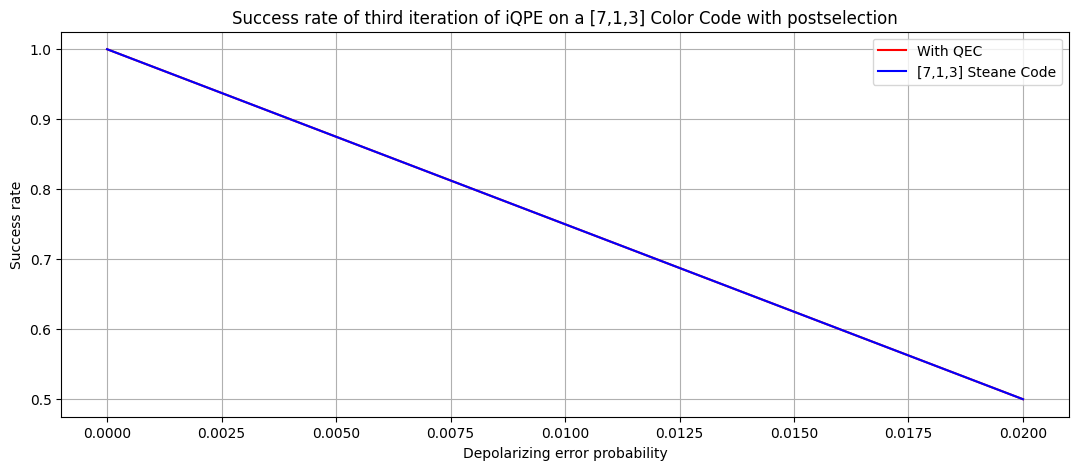

In [6]:
x = np.linspace(0,0.02,2)
y = []
y_no_QEC = []
one, zero, one_QEC, zero_QEC, pre, post, pre_QEC, post_QEC = [],[],[],[],[],[],[],[]
shots = 1
for i in x:
    # depolarizing_prob = i
    # dep_error = depolarizing_error(depolarizing_prob, 1)
    # dep_error_2q = depolarizing_error(depolarizing_prob, 2)
    # noise_model = NoiseModel()
    # noise_model.add_all_qubit_quantum_error(dep_error, ['x', "z",'h'])  # Apply to single-qubit gates
    # noise_model.add_all_qubit_quantum_error(dep_error_2q, ["cx"])  # Apply to 2-qubit gates
    
    cbits = ClassicalRegister(3,"c")
    qc = code_goto(cbits=cbits)
    qecc = ClassicalRegister(6)

    X_L(qc,1)
    H_L(qc,0)
    CT_L(qc, cbits, qecc, err = False)
    adj_T_L(qc,cbits, 0)
    H_L(qc,0)

    zeros, ones, preselec , postselec = readout(qc, 0, shots, i)

    total = zeros + ones

    if total == 0:
        y_no_QEC.append(0.5)
    else:
        y_no_QEC.append(zeros/total)
    pre.append(preselec), post.append(postselec), one.append(ones), zero.append(zeros)
    ###################################################################################################
    cbits = ClassicalRegister(3,"c")
    qc = code_goto(cbits=cbits)

    qecc = ClassicalRegister(6)
    qc.add_register(qecc)

    X_L(qc,1)
    H_L(qc,0)
    CT_L(qc, cbits, qecc, err = True)
    qec(qc, qecc, 0)
    adj_T_L(qc, cbits, 0)
    H_L(qc,0)
    qec(qc, qecc, 0)

    zeros, ones, preselec , postselec = readout(qc, 0, shots, i)

    total = zeros + ones

    if total == 0:
        y.append(0.5)
    else:
        y.append(zeros/total)
        
    pre_QEC.append(preselec), post_QEC.append(postselec), one_QEC.append(ones), zero_QEC.append(zeros)

data = np.array((x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC))
#np.savetxt("Plots/text/Steane_3rd_Pauli.txt", data, delimiter=",")

fig, ax = plt.subplots(figsize=(13,5))

ax.plot(x,y,label = "With QEC", color="red")
ax.plot(x,y_no_QEC, label = "[7,1,3] Steane Code", color="blue")
plt.title("Success rate of third iteration of iQPE on a [7,1,3] Color Code with postselection")
plt.xlabel("Depolarizing error probability")
plt.ylabel("Success rate")
plt.grid()
plt.legend()
plt.show()